In [8]:
project_root

'c:\\Users\\josan\\Documents\\EPFL'

In [9]:
'''
Script to train MicroSNet on Microstates timeseries
'''
import os
import gc
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pickle

import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

from sklearn.model_selection import train_test_split

sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))

from lib import my_functions as mf
from lib import my_models as mm

# print(f'==================== Start of script {os.path.basename(__file__)}! ===================')

# Explicit CUDA setup
if torch.cuda.is_available():
    device = torch.device("cuda:0")  # Specify GPU 0 explicitly
    torch.cuda.set_device(0)
    print(f"Using GPU: {torch.cuda.get_device_name(0)}")
    print(f"CUDA Version: {torch.version.cuda}")
    print(f"Available GPUs: {torch.cuda.device_count()}")
else:
    device = torch.device("cpu")
    print("CUDA not available, using CPU")
mf.print_memory_status("- INITIAL STARTUP")
# ---------------------------# Load files ---------------------------
# Get the absolute path to the project root
script_dir = os.path.dirname(os.getcwd()) 
project_root = script_dir
# Set absolute paths
data_path = os.path.join(project_root, 'Data') + os.sep
output_folder = os.path.join(project_root, 'Output') + os.sep

type_of_subject = 'dependent'  # or 'dep' for dependent subjects
model_name = 'microsnet'  # 'microsnet' or 'multiscale_microsnet'
output_path = f'{output_folder}ica_rest_all/{type_of_subject}/'
input_path = f'{output_folder}ica_rest_all/'
# Making sure all paths exist
if not os.path.exists(input_path):
    print(f'{input_path} doesn\'t exist.')
if not os.path.exists(output_path):
    print(f'{output_path} doesn\'t exist.')

# Parameters 
do_all = False
n_subjects = 50
num_epochs = 50
batch_size = 32  # or 256 if memory allows
n_clusters = 5
subject_list = list(range(n_subjects))
_, all_y = mf.load_all_data(subjects_list=None, do_all=do_all, data_path=data_path, output_folder=output_folder)
mf.print_memory_status("- AFTER DATA LOADING") 

kmeans_path = os.path.join(input_path, 'modkmeans_results', 'ms_timeseries')
ms_timeseries_path = os.path.join(kmeans_path, 'ms_timeseries.pkl')
with open(ms_timeseries_path, 'rb') as f:
    finals_ls = pickle.load(f)

mf.set_seed(42)

if n_subjects == 1:
    test_subjects = [0]
else:
    test_subjects = list(range(n_subjects))
    
output_file = os.path.join(output_path, f'{type_of_subject}_ms_{model_name}_results_ica_rest_all.npy')


Using GPU: NVIDIA GeForce RTX 2050
CUDA Version: 11.8
Available GPUs: 1

MEMORY STATUS - INITIAL STARTUP
Process Memory (RSS): 513.7 MB
Process Memory (VMS): 1409.3 MB
System Total RAM: 31.7 GB
System Available RAM: 14.9 GB
System RAM Usage: 53.0%
GPU Memory Allocated: 0.0 MB
GPU Memory Reserved: 0.0 MB


MEMORY STATUS - AFTER DATA LOADING
Process Memory (RSS): 4683.6 MB
Process Memory (VMS): 5587.4 MB
System Total RAM: 31.7 GB
System Available RAM: 10.8 GB
System RAM Usage: 65.9%
GPU Memory Allocated: 0.0 MB
GPU Memory Reserved: 0.0 MB



In [32]:
subject_id = 0
n_trial = 5

In [33]:
path = kmeans_path + "/" +  "ms_timeseries_c5_harmonize_indiv"
file = path + f"\ms00{subject_id}.npy"

In [34]:
data = np.load(file)
data_0 = data[n_trial]

In [35]:
data_originals = finals_ls[subject_id]
data_originals_0 = data_originals[n_trial]

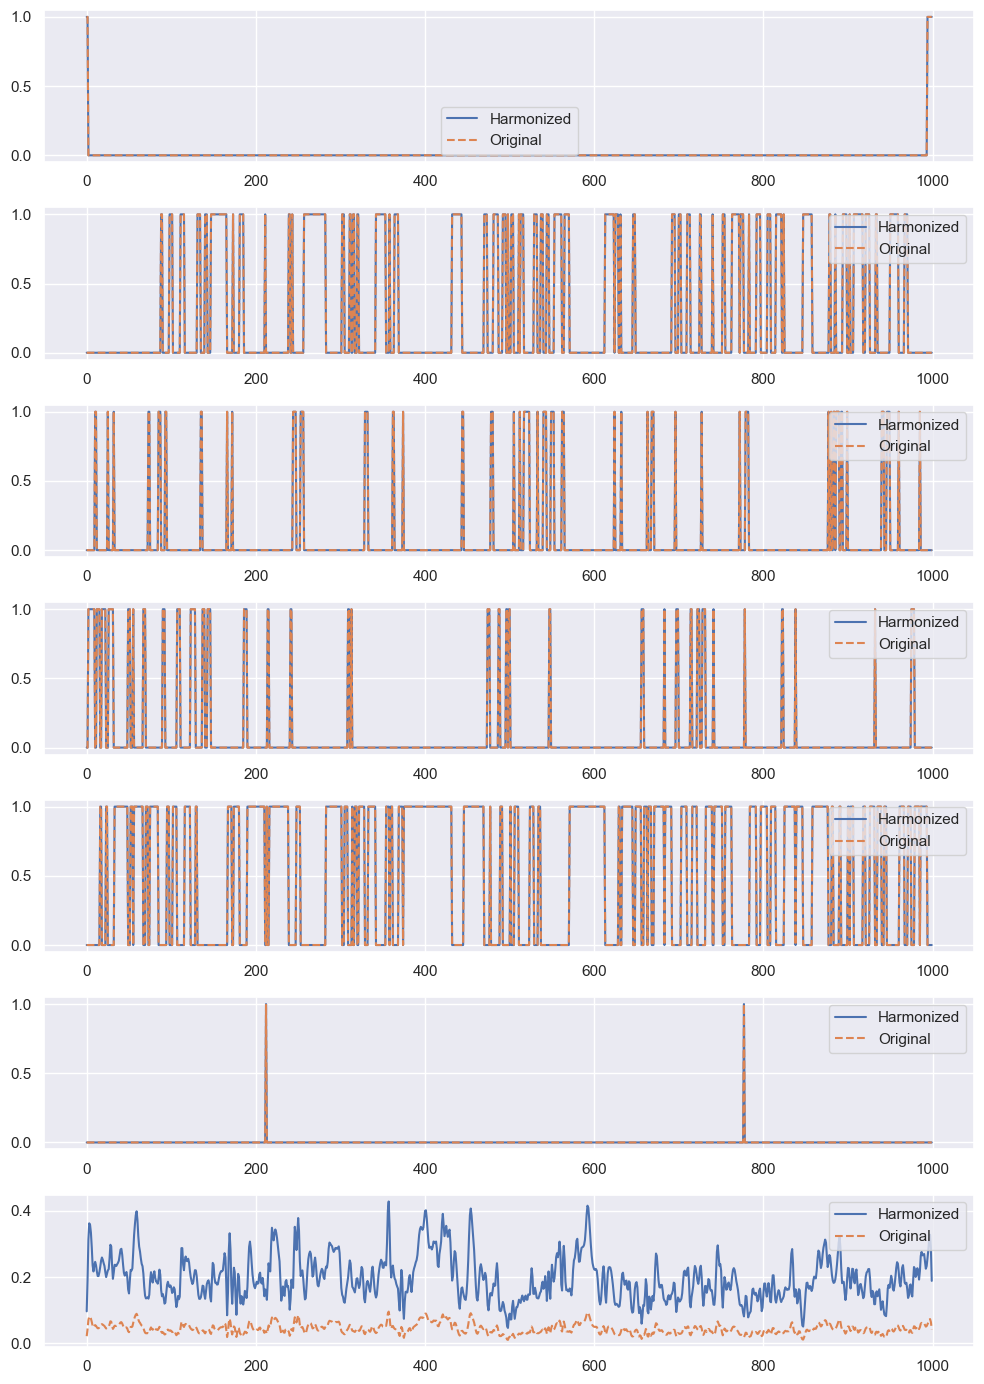

In [36]:
fig, axs = plt.subplots(nrows=len(data_0), ncols=1, figsize=(10, 2 * len(data_0)))
for ax, d, d_og in zip(axs, data_0, data_originals_0):
    ax.plot(d, label='Harmonized')
    ax.plot(d_og, label='Original', linestyle='dashed')
    ax.legend()
plt.tight_layout()
plt.show()
